In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
from torchvision import datasets, transforms, models
from collections import OrderedDict
import PIL

In [3]:
from pathlib import Path
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [4]:
!ls

anaconda3    poke.ipynb		     run.sh  train
poke2.ipynb  pokemon_dataset.tar.gz  test    valid


In [5]:
data_dir = '/home/user/'
test_dir = data_dir + 'test'
train_dir = data_dir + 'train'
valid_dir = data_dir + 'valid'

In [6]:
means = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [7]:
train_transforms = transforms.Compose(
    [
        transforms.RandomResizedCrop(224),
        transforms.RandomRotation(60),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(means,std)
    ])

# TODO: Load the datasets with ImageFolder
train_image_datasets = datasets.ImageFolder(train_dir,transform=train_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
train_dataloaders = torch.utils.data.DataLoader(train_image_datasets,
                                                batch_size=32,
                                                shuffle=True)

In [8]:
test_transforms = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(means,std)
    ])

# TODO: Load the datasets with ImageFolder
test_image_datasets = datasets.ImageFolder(test_dir,transform=test_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
test_dataloaders = torch.utils.data.DataLoader(test_image_datasets,
                                                batch_size=32,
                                                shuffle=True)

In [9]:
valid_transforms = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(means,std)
    ])

# TODO: Load the datasets with ImageFolder
valid_image_datasets = datasets.ImageFolder(valid_dir,transform=test_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
valid_dataloaders = torch.utils.data.DataLoader(valid_image_datasets,
                                                batch_size=32,
                                                shuffle=True)

In [10]:
test_image_datasets.imgs

[('/home/user/test/Abra/10a9f06ec6524c66b779ea80354f8519.jpg', 0),
 ('/home/user/test/Abra/34532bb006714727ade4075f0a72b92d.jpg', 0),
 ('/home/user/test/Abra/649a7e234cac44feba6da6652127f423.jpg', 0),
 ('/home/user/test/Abra/9754fcfa5d39464785f953e7c9da73d1.jpg', 0),
 ('/home/user/test/Abra/c9ab368481e446d685b1c1fdb42487df.jpg', 0),
 ('/home/user/test/Aerodactyl/35933037ff854c2784e5199f6dc8a728.jpg', 1),
 ('/home/user/test/Aerodactyl/41e07cd07e9a4d25b9ad5a9ca08f3b5e.jpg', 1),
 ('/home/user/test/Aerodactyl/bb6be0f790654421a4456b1b9242e0a1.jpg', 1),
 ('/home/user/test/Alakazam/19e3ed99fae14c04af32a8d2f31d50cd.jpg', 2),
 ('/home/user/test/Alakazam/64527ef991ff42c6883623f263f3c2f4.jpg', 2),
 ('/home/user/test/Alolan Sandslash/0735929ea83a45ef8f4016e94cf17db0.jpg', 3),
 ('/home/user/test/Alolan Sandslash/6525ea05a6aa4932b6aa6307f287d0c3.jpg', 3),
 ('/home/user/test/Alolan Sandslash/a6ff19772460426898e76517f9b08edf.jpg', 3),
 ('/home/user/test/Alolan Sandslash/wp2403441.jpg', 3),
 ('/home/us

In [11]:
train_image_datasets.class_to_idx

{'Abra': 0,
 'Aerodactyl': 1,
 'Alakazam': 2,
 'Alolan Sandslash': 3,
 'Arbok': 4,
 'Arcanine': 5,
 'Articuno': 6,
 'Beedrill': 7,
 'Bellsprout': 8,
 'Blastoise': 9,
 'Bulbasaur': 10,
 'Butterfree': 11,
 'Caterpie': 12,
 'Chansey': 13,
 'Charizard': 14,
 'Charmander': 15,
 'Charmeleon': 16,
 'Clefable': 17,
 'Clefairy': 18,
 'Cloyster': 19,
 'Cubone': 20,
 'Dewgong': 21,
 'Diglett': 22,
 'Ditto': 23,
 'Dodrio': 24,
 'Doduo': 25,
 'Dragonair': 26,
 'Dragonite': 27,
 'Dratini': 28,
 'Drowzee': 29,
 'Dugtrio': 30,
 'Eevee': 31,
 'Ekans': 32,
 'Electabuzz': 33,
 'Electrode': 34,
 'Exeggcute': 35,
 'Exeggutor': 36,
 'Farfetchd': 37,
 'Fearow': 38,
 'Flareon': 39,
 'Gastly': 40,
 'Gengar': 41,
 'Geodude': 42,
 'Gloom': 43,
 'Golbat': 44,
 'Goldeen': 45,
 'Golduck': 46,
 'Golem': 47,
 'Graveler': 48,
 'Grimer': 49,
 'Growlithe': 50,
 'Gyarados': 51,
 'Haunter': 52,
 'Hitmonchan': 53,
 'Hitmonlee': 54,
 'Horsea': 55,
 'Hypno': 56,
 'Ivysaur': 57,
 'Jigglypuff': 58,
 'Jolteon': 59,
 'Jynx': 60,

In [12]:
inverse_dict = {}
for i,j in train_image_datasets.class_to_idx.items():
    inverse_dict[j] = i

In [13]:
inverse_dict

{0: 'Abra',
 1: 'Aerodactyl',
 2: 'Alakazam',
 3: 'Alolan Sandslash',
 4: 'Arbok',
 5: 'Arcanine',
 6: 'Articuno',
 7: 'Beedrill',
 8: 'Bellsprout',
 9: 'Blastoise',
 10: 'Bulbasaur',
 11: 'Butterfree',
 12: 'Caterpie',
 13: 'Chansey',
 14: 'Charizard',
 15: 'Charmander',
 16: 'Charmeleon',
 17: 'Clefable',
 18: 'Clefairy',
 19: 'Cloyster',
 20: 'Cubone',
 21: 'Dewgong',
 22: 'Diglett',
 23: 'Ditto',
 24: 'Dodrio',
 25: 'Doduo',
 26: 'Dragonair',
 27: 'Dragonite',
 28: 'Dratini',
 29: 'Drowzee',
 30: 'Dugtrio',
 31: 'Eevee',
 32: 'Ekans',
 33: 'Electabuzz',
 34: 'Electrode',
 35: 'Exeggcute',
 36: 'Exeggutor',
 37: 'Farfetchd',
 38: 'Fearow',
 39: 'Flareon',
 40: 'Gastly',
 41: 'Gengar',
 42: 'Geodude',
 43: 'Gloom',
 44: 'Golbat',
 45: 'Goldeen',
 46: 'Golduck',
 47: 'Golem',
 48: 'Graveler',
 49: 'Grimer',
 50: 'Growlithe',
 51: 'Gyarados',
 52: 'Haunter',
 53: 'Hitmonchan',
 54: 'Hitmonlee',
 55: 'Horsea',
 56: 'Hypno',
 57: 'Ivysaur',
 58: 'Jigglypuff',
 59: 'Jolteon',
 60: 'Jynx',

In [14]:
def network_vgg19(labels=150,drop=0.5, hidden1=2048, hidden2=1024,learn_rate=0.0001):
    '''
    input:
    labels (102 categories)
    drop (default 0.5)
    hidden layers 1 & 2
    learning rate
    
    outputs model, critereon and optimizer
    '''
    model = models.vgg19(pretrained=True)
    for p in model.parameters():
        p.requires_grad = False
        
    # Hyperparameters for our network
    input_size = 25088

    # Build a feed-forward network
    classifier = nn.Sequential(nn.Linear(input_size, hidden1),
                               nn.ReLU(),
                               nn.Dropout(drop),
                               nn.Linear(hidden1, hidden2),
                               nn.ReLU(),
                               nn.Dropout(drop),
                               nn.Linear(hidden2, labels),
                               nn.LogSoftmax(dim=1))

    model.classifier = classifier

    crit = nn.NLLLoss()

    optimize = optim.Adam(
        model.classifier.parameters(),
        learn_rate)

    model.cuda()

    return model, crit, optimize

In [15]:
torch.cuda.is_available()

True

In [16]:
structure = 'vgg' # or 'dense'

In [17]:
model,critereon,optimizer = network_vgg19(150,
                                          drop=0.3,
                                          hidden1=4096,
                                          hidden2=2048,
                                          learn_rate=0.0001)

In [18]:
model.to('cuda')
epochs = 20
print_every = 100
steps = 0

In [19]:
print(structure)
for e in range(epochs):
    running_loss = 0
    for _, (images, labels) in enumerate(train_dataloaders):
        steps += 1
        optimizer.zero_grad()
        im = images.to('cuda')
        lbl = labels.to('cuda')
        # Forward and backward passes
        output = model.forward(im)
        loss = critereon(output, lbl)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            model.eval()
            acc_v = 0
            loss_v = 0
            for _,(images_validation,labels_validation) in enumerate(valid_dataloaders):
                optimizer.zero_grad()
                im_v  = images_validation.to('cuda')
                lbl_v = labels_validation.to('cuda')
                with torch.no_grad():
                    out_v  = model.forward(im_v)
                    loss_v = critereon(out_v,lbl_v)
                    p = torch.exp(out_v).data
                    tp = (lbl_v.data == p.max(1)[1])
                    acc_v += tp.type_as(torch.FloatTensor()).mean()
                
            valid_size = len(valid_dataloaders)
            loss_t = running_loss/len(train_dataloaders)
            loss_v = loss_v / valid_size
            acc_v  = acc_v  / valid_size
            running_loss = 0
        
            print(f'Epoch: {e+1}, Train Loss: {loss_t:.3f}, Valid. Loss: {loss_v:.3f}, Valid. Acc: {acc_v:.3f}')
            steps = 0
            model.train()

vgg
Epoch: 1, Train Loss: 3.272, Valid. Loss: 0.157, Valid. Acc: 0.059
Epoch: 2, Train Loss: 1.401, Valid. Loss: 0.142, Valid. Acc: 0.128
Epoch: 2, Train Loss: 2.619, Valid. Loss: 0.096, Valid. Acc: 0.305
Epoch: 3, Train Loss: 2.197, Valid. Loss: 0.096, Valid. Acc: 0.343
Epoch: 4, Train Loss: 0.885, Valid. Loss: 0.083, Valid. Acc: 0.456
Epoch: 4, Train Loss: 1.920, Valid. Loss: 0.080, Valid. Acc: 0.452
Epoch: 5, Train Loss: 1.614, Valid. Loss: 0.093, Valid. Acc: 0.470
Epoch: 6, Train Loss: 0.635, Valid. Loss: 0.075, Valid. Acc: 0.550
Epoch: 6, Train Loss: 1.589, Valid. Loss: 0.052, Valid. Acc: 0.541
Epoch: 7, Train Loss: 1.326, Valid. Loss: 0.052, Valid. Acc: 0.555
Epoch: 8, Train Loss: 0.506, Valid. Loss: 0.054, Valid. Acc: 0.591
Epoch: 8, Train Loss: 1.384, Valid. Loss: 0.055, Valid. Acc: 0.584
Epoch: 9, Train Loss: 1.135, Valid. Loss: 0.032, Valid. Acc: 0.623
Epoch: 10, Train Loss: 0.433, Valid. Loss: 0.054, Valid. Acc: 0.609
Epoch: 10, Train Loss: 1.305, Valid. Loss: 0.040, Valid. 

In [20]:
loss_t = 0
acc_t = 0

model.eval()

with torch.no_grad():
    for _, (images,labels) in enumerate(test_dataloaders):
        img,lbl = images.to('cuda'),labels.to('cuda')
        output = model.forward(img)
        loss = critereon(output, lbl)
        running_loss += loss.item()

        p = torch.exp(output).data
        tp = (lbl.data == p.max(1)[1])
        acc_t += tp.type_as(torch.FloatTensor()).mean()
        
    print(f'Test loss: {loss/len(test_dataloaders):.3f}, Test Acc: {acc_t/len(test_dataloaders):.3f}')

Test loss: 0.106, Test Acc: 0.666


In [21]:
checkpoint = {'state_dict':model.state_dict(),
              'classifier': model.classifier,
              'structure': structure,
              'class_to_idx':train_image_datasets.class_to_idx,
              'opt_state':optimizer.state_dict,
              'num_epochs':epochs
             }

In [22]:
torch.save(checkpoint, 'test_checkpoint.pth')

In [23]:
def process_image(image):
    im = PIL.Image.open(f'{image}.jpg')
    transform = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(means,std)
    ])
    trans = transform(im)
    return np.array(trans)
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # TODO: Process a PIL image for use in a PyTorch model

In [24]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    #model.to('cpu')
    loaded_model = (model)
    im = process_image(image_path)
    # image in torch
    imt = torch.from_numpy(im).type(torch.cuda.FloatTensor)
    # unsqueeze 
    imt_uns = imt.unsqueeze_(0) # in place
    imt_uns = imt_uns.float()
    # TODO: Implement the code to predict the class from an image file
    loaded_model.eval()
    with torch.no_grad():
        output = loaded_model.forward(imt_uns.cuda())
    prob = torch.exp(output)
    probs, ind = prob.topk(topk)
    
    return prob.topk(topk)

In [25]:
predict('/home/user/test/Pikachu/00000046',model,5)

torch.return_types.topk(
values=tensor([[9.9996e-01, 1.8651e-05, 1.0162e-05, 3.5732e-06, 2.8837e-06]],
       device='cuda:0'),
indices=tensor([[102, 111,  15,  56,  29]], device='cuda:0'))

In [26]:
inverse_dict[102]

'Pikachu'

In [27]:
predict('/home/user/test/Jigglypuff/5338239593f94d11be9955ae8cd74dc8',model,3)

torch.return_types.topk(
values=tensor([[0.3954, 0.0404, 0.0310]], device='cuda:0'),
indices=tensor([[ 58,  77, 131]], device='cuda:0'))

In [28]:
inverse_dict[58]

'Jigglypuff'

In [29]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

/home/user/test/Pikachu/00000046


<AxesSubplot:>

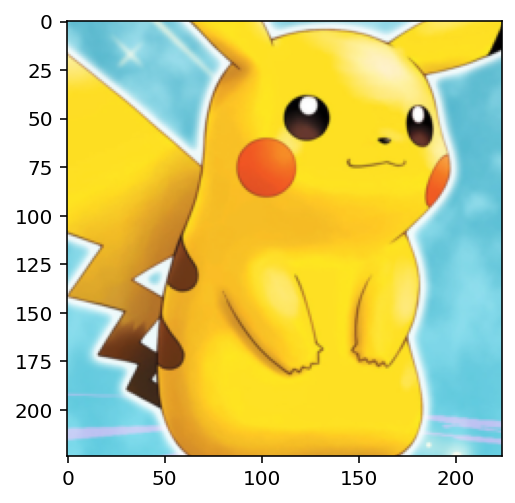

In [30]:
test_image = '/home/user/test/Pikachu/00000046'
print(test_image)
imshow(process_image(test_image))

/home/user/test/Meowth/8bb3f19743e04fa884cdd4771619259d


<AxesSubplot:>

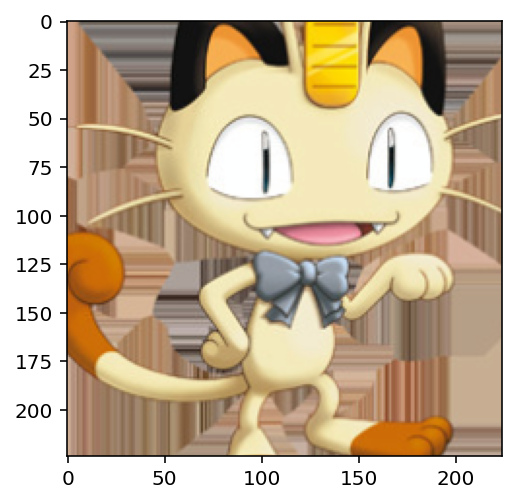

In [31]:

test_image = '/home/user/test/Meowth/8bb3f19743e04fa884cdd4771619259d'
print(test_image)
imshow(process_image(test_image))

In [32]:
predict('/home/user/test/Meowth/8bb3f19743e04fa884cdd4771619259d',model,3)

torch.return_types.topk(
values=tensor([[0.7531, 0.0503, 0.0403]], device='cuda:0'),
indices=tensor([[80, 98,  2]], device='cuda:0'))

In [34]:
inverse_dict[80]

'Meowth'